April 21, 2016 - Women in Data Science Meetup - "Data Science from Scratch" Workshop #2

# Exploring the Titanic Data set with Pandas:

This is an exploration of the Titanic Data Set which is available at https://www.kaggle.com/c/titanic/data, this pandas notebook has been forked from https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb and modified for this workshop.  

### Import Libraries

In [139]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("white")
#make figures appear as they're made
%matplotlib inline 
# Set default matplot figure size
mpl.pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Install Watermark - tool to help with reproducibility:

Always use this tool to document what versions of packages were used and the machine that was used.  Make sure to include the packages that were imported in the previous section.  <a href='http://sebastianraschka.com/'>Sebastian Raschka</a> is the author of it - his site is a great resource for IPython/Python and other Machine Learning topics!  Thank you Sebastian! 

In [82]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


In [83]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [87]:
%watermark -n -t -z -u -m -w -v -p matplotlib,numpy,conda
#%watermark -n -t -z -u -m -w -v -p matplotlib,numpy,conda,seaborn

last updated: Thu Apr 21 2016 20:08:39 CDT

CPython 2.7.11
IPython 4.0.1

matplotlib 1.5.0
numpy 1.10.1
conda 3.18.8

compiler   : GCC 4.2.1 (Apple Inc. build 5577)
system     : Darwin
release    : 15.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
watermark v. 1.2.3


If any of these libraries are not available, install them using "conda install ____" at the command prompt.

## Reading Data Set using Pandas

Make sure your train.csv file is in the same directory as this iPython Notebook.

In [6]:
titanic_df = pd.read_csv('train.csv')

## <font color='blue'>You've read in the training data, which you can think of as being organized kind of like a spreadsheet.  In Pandas, this data structure is called a Data Frame.</font>

## <font color='blue'>Q:  What are some of the first things you would want to know about your Data Frame?</font> 

## <font color='blue'>Talk with your group and post your group's answers to the Slack channel.</font>

## How to Interact with a Data Frame (df)

In [7]:
# Check the first 5 rows of the data frame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
# Column names
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [9]:
# Information about the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [10]:
#We can refer to a column of data as:
names1 = titanic_df.Name

In [11]:
#or as below:
names2 = titanic_df['Name']

In [12]:
#Both give you the same thing.
print(names1.head())
print(names2.head())
print(titanic_df['Name'].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [13]:
#Refer to a row with:
titanic_df.ix[0] #for first row

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [18]:
#Use python slicing techniques from last time
#for first 6 rows of column 4:
titanic_df.ix[:5,4]
#same thing:
#titanic_df.ix[0:5,4] 

0      male
1    female
2    female
3    female
4      male
5      male
Name: Sex, dtype: object

In [20]:
#Also, you can call and manipulate a df at the same time:
kids = titanic_df[titanic_df['Age'] < 20]

#You can make this more complex:
alivekids = titanic_df[(titanic_df.Age < 20) & (titanic_df.Survived == 1)]

## <font color='blue'>Try this yourself.  Make one or two new variables by selecting on two different features.</font>

In [33]:
oldwomen = titanic_df[(titanic_df.Age > 60) & (titanic_df.Sex == 'female')]
#print oldwomen

richdudes = titanic_df[(titanic_df.Fare > 500) & (titanic_df.Sex == 'male')]
print richdudes

     PassengerId  Survived  Pclass                                Name   Sex  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  male   
737          738         1       1              Lesurer, Mr. Gustave J  male   

     Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
679   36      0      1  PC 17755  512.3292  B51 B53 B55        C  
737   35      0      0  PC 17755  512.3292         B101        C  


# Making plots and graphs

## <font color='blue'>Let's make some graphs with these variables using matplotlib.</font>

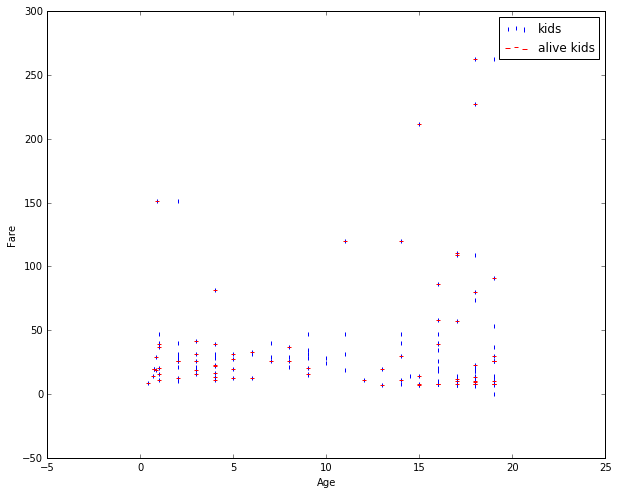

In [51]:
#only need the first two lines for outside an ipython notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(kids.Age,kids.Fare,marker='|',color='b')
ax.scatter(alivekids.Age, alivekids.Fare,marker='_',color='r')
plt.xlabel('Age')
plt.ylabel('Fare')
handles, labels = ax.get_legend_handles_labels()
labels=['kids','alive kids']
ax.legend(handles, labels)

## <font color='blue'>We can group our data to look at specific trends, and use the Pandas plotting method.</font>

In [52]:
groupkids = kids.groupby('Age')

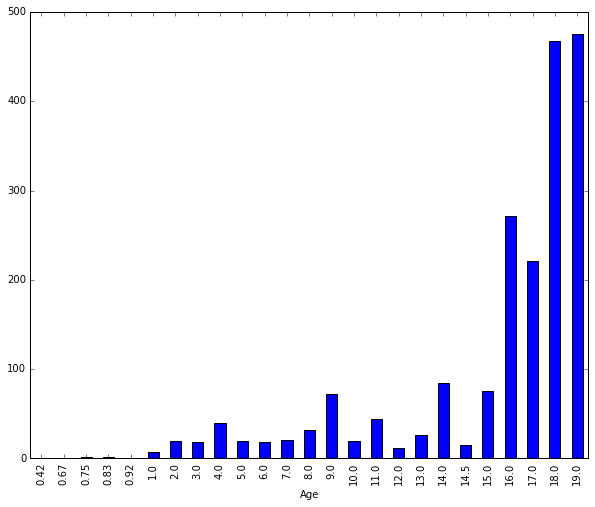

In [53]:
#Here we want the total number of kids at each age to make a bar graph.
groupkids['Age'].sum().plot(kind='bar')

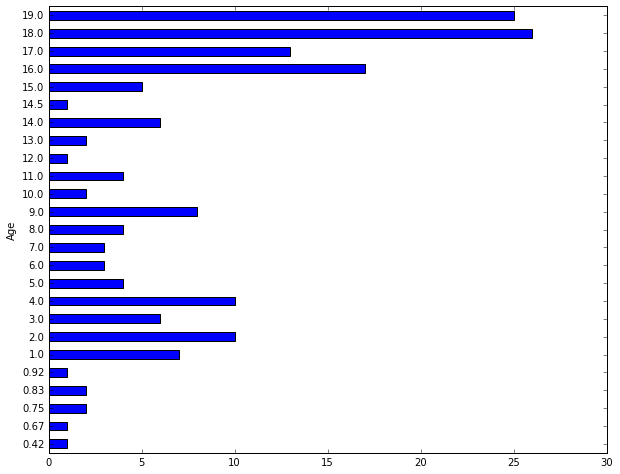

In [69]:
#Or a horizontal bar graph.
groupkids['Age'].count().plot(kind='barh')

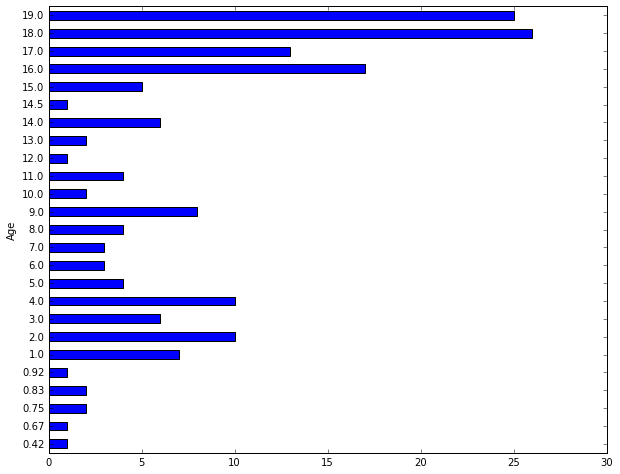

In [67]:
#instead of writing as above, we could save ourselves a step and write:
kids.groupby('Age')['Age'].count().plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110bfe850>]], dtype=object)

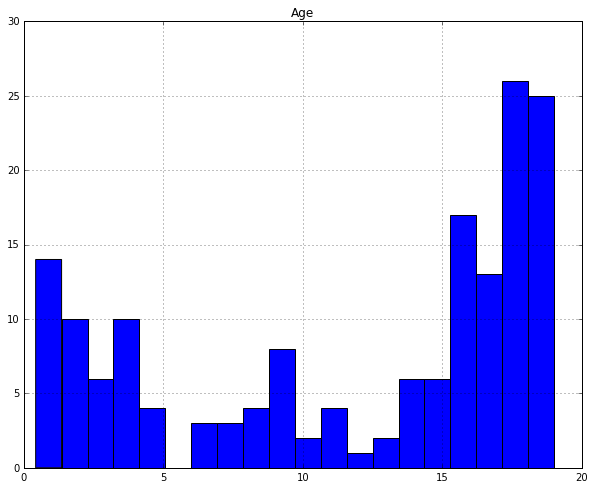

In [71]:
kids.hist('Age',bins=20)

## <font color='blue'>Make a graph with the variable that you defined above in step 12.</font>

## <font color='blue'>All of the plotting that we did above used matplotlib, including the Pandas plotting method.  However, seaborn is another plotting package that's prettier and has extra built-in functions!</font>

## To use seaborn, go back up to the import statements and uncomment the "import seaborn" line.  You should also add seaborn to your list of watermarks.

In [77]:
# Number of passengers in each class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

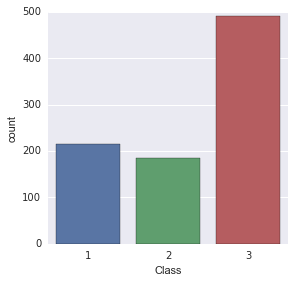

In [79]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1)
fg.set_xlabels('Class')

## <font color='blue'>Count the number of passengers of each sex now.</font>

In [88]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

## <font color='blue'>Instead of a group by, use seaborn to plot the number of males and females.</font>

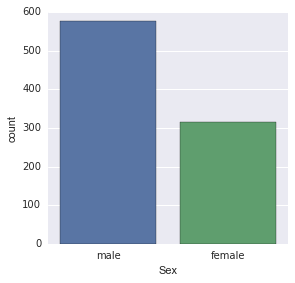

In [90]:
sns.factorplot('Sex', data=titanic_df, kind='count', aspect=1)

## <font color='blue'>Describe the results you found in the slack channel.</font>

In [91]:
# Number of men and women in each of the passenger class.
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

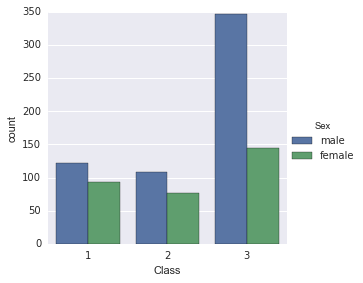

In [93]:
# Again use seaborn to group by Sex and class
g = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.)
g.set_xlabels('Class')

As shown in the figure above, there are more than two times males than females in class 3. However, in classes 1
and 2, the ratio of male to female is almost 1.

# Pivot tables

# <font color='blue'>Write a groupby statement to find the number of men and women in each of the passenger class who survived.</font>

In [94]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [107]:
# We can represent this same information another way using pivot_table.

# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)
len(titanic_df['Sex'])



891

## <font color='blue'>Create a variable for the passengers who didn't survive.<font>

In [96]:
not_survived = titanic_df[titanic_df['Survived']==0]

## <font color='blue'>Create a factor plot of passengers who survived vs. those who didn't.</font>

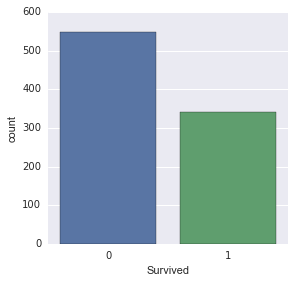

In [97]:
sns.factorplot('Survived', data=titanic_df, kind='count')

## <font color='blue'>Calculate the number of passengers who didn't survive.</font>

In [98]:
len(not_survived)

549

## <font color='blue'>Change the statement below to include your variable from above to calculate the total number of passengers who didn't survive.  You will need to change 2 things.</font>

In [ ]:
# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

# Crosstab and unstacking

In [108]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])

In [109]:
table

Sex             female         male         
Embarked             C   Q   S    C   Q    S
Survived Pclass                             
0        1           1   0   2   25   1   51
         2           0   0   6    8   1   82
         3           8   9  55   33  36  231
1        1          42   1  46   17   0   28
         2           7   2  61    2   0   15
         3          15  24  33   10   3   34

In [118]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [119]:
table.columns, table.index

(MultiIndex(levels=[[u'female', u'male'], [u'C', u'Q', u'S']],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=[u'Sex', u'Embarked']),
 MultiIndex(levels=[[0, 1], [1, 2, 3]],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=[u'Survived', u'Pclass']))

In [125]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=False)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

# Basic statistics

In [126]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively.'%(titanic_df.Age.mean(), 
                                                                          titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively.


In [127]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [128]:
# Drop missing values for the records in which age passenger is missing
#print sum(pd.isnull(titanic_df['Age']))
age = titanic_df['Age'].dropna()


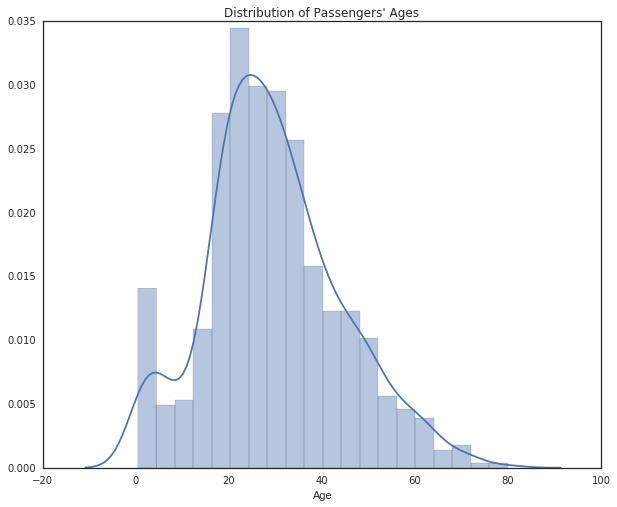

In [140]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

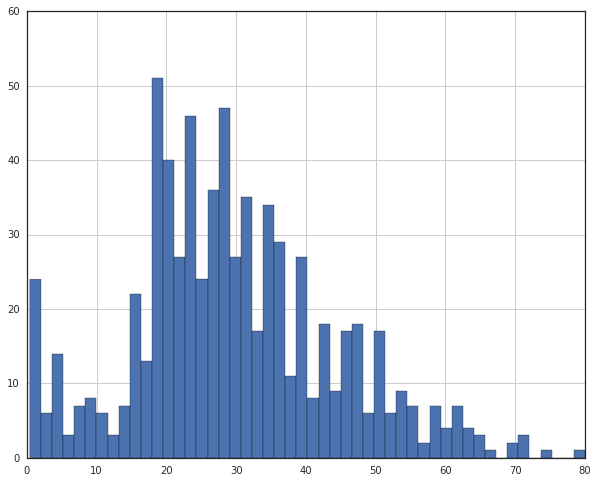

In [141]:
# Another way to plot a histogram of ages is shown below
titanic_df['Age'].hist(bins=50)

# Modifying your data to learn more

In [131]:
# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [132]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [133]:
# Let's have a look at the first 10 rows of the data frame
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


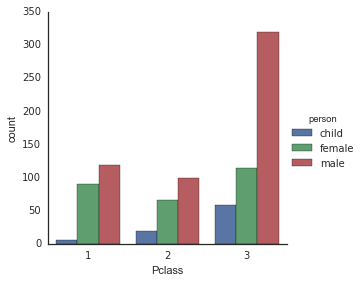

In [138]:
# Let's do a factorplot of passengers split into sex, children and class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1)


In [142]:
# Count number of men, women and children
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

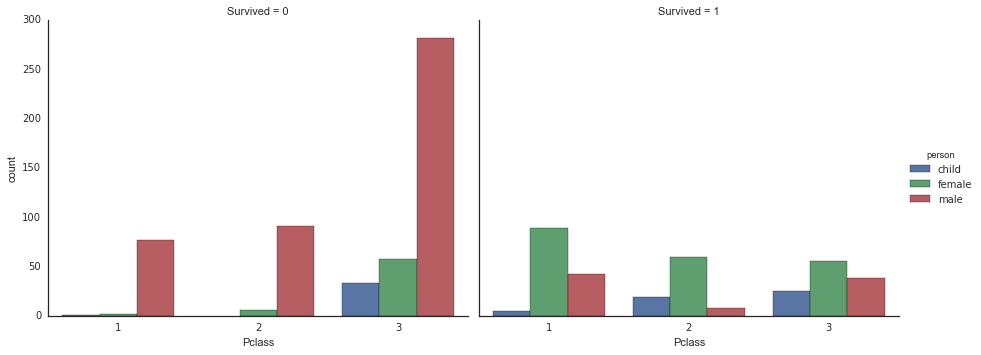

In [143]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

There are many more children in third class than there are in first and second class. However, one might expect that
there would be more children in 1st and 2nd class than there are in 3rd class.

Also, we can see that women and children really did seem to make it off first.

### Distribution of Passengers' Ages - <a href='https://en.wikipedia.org/wiki/Kernel_density_estimation'>Kernel Density Estimation</a> Plots

#### Grouped by Gender

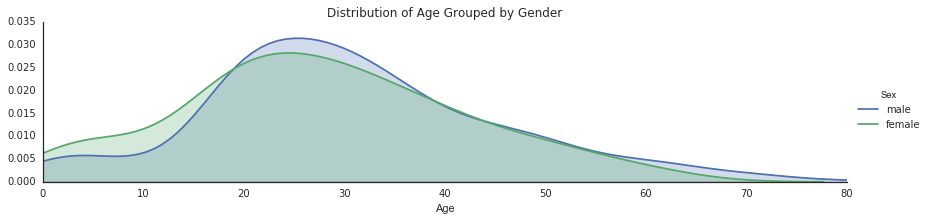

In [146]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

## <font color='blue'>Q: Make the distribution of Age grouped by Person.</font>

#### Grouped by Person

In [1]:
#f, ax = plt.subplots(3)
class1=titanic_df[titanic_df['Pclass']==1]
fig = sns.FacetGrid(class1, hue='person', aspect=4,hue_order=['male','female','child'])
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age in Class 1 Grouped by Personhood')
fig.add_legend()

class2=titanic_df[titanic_df['Pclass']==2]
fig = sns.FacetGrid(class2, hue='person', aspect=4,hue_order=['male','female','child'])
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age in Class 2 Grouped by Personhood')

class3=titanic_df[titanic_df['Pclass']==3]
fig = sns.FacetGrid(class3, hue='person', aspect=4,hue_order=['male','female','child'])
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age in Class 3 Grouped by Personhood')

NameError: name 'titanic_df' is not defined

## <font color='blue'>Q: Make the distribution of Age grouped by Class.</font>

#### Grouped by Class

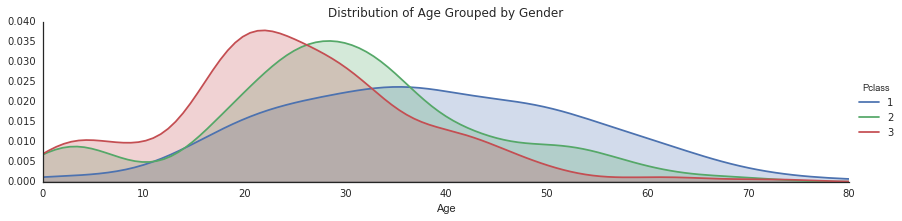

In [154]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

## <font color='blue'>Q: Reflections on these plots?</font>

#### What cabins did the Passengers stay in?

In [181]:
deck = titanic_df['Cabin'].dropna() # We just want to look at the non-empty values
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [182]:
# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])

In [183]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

#### Really handy and frequently used Python data type - Container datatype called Counter - read more about it at https://pymotw.com/2/collections/counter.html

In [184]:
from collections import Counter 
Counter(d) # can take a list and count the items in the list

Counter({'A': 15, 'B': 47, 'C': 59, 'D': 33, 'E': 32, 'F': 13, 'G': 4, 'T': 1})

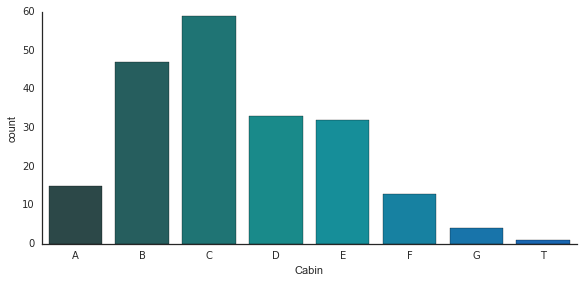

In [185]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2, 
              palette='winter_d')

In [186]:
# Drop the 'T' cabin
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

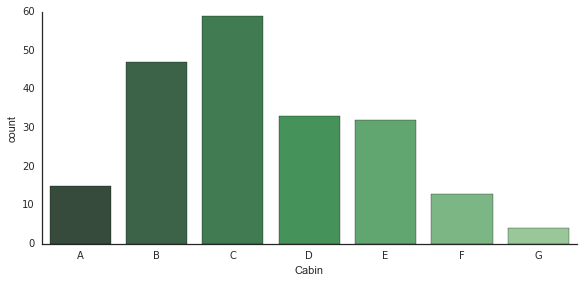

In [187]:
# Then replot the Cabins factorplot as above
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='Greens_d')

#### Link to the list of matplotlib colormaps - 'http://matplotlib.org/examples/color/colormaps_reference.html'


#### Where did the passengers come from i.e. Where did the passengers land into the ship from?

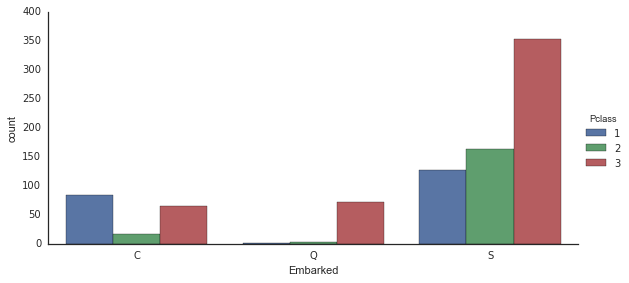

In [188]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third 
class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers 
who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 
127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [ ]:
titanic_df.Embarked.value_counts()

In [ ]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]

In [ ]:
port

In [ ]:
port.index

In [ ]:
port.columns

In [ ]:
port.index=[['First','Second','Third']]

In [ ]:
port

#### Who was alone and who was with parents or siblings?

In [ ]:
titanic_df[['SibSp','Parch']].head()

In [ ]:
# Add Alone column to indicate whether the passenger was alone or with family

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df.loc[titanic_df['Alone']>0, 'Alone'] = 'With family'
titanic_df.loc[titanic_df['Alone']==0, 'Alone'] = 'Alone'



In [ ]:
titanic_df.head()

In [ ]:
fg=sns.factorplot('Alone', data=titanic_df, kind='count', hue='Pclass', col='person', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

From the figure above, it is clear that most children traveled with family in third class. For men, most traveled alone in third class. On the other hand, the number of female passengers who traveled either with family or alone among the second and third class is comparable. However, more women traveled with family than alone in first class. 

### Factors Affecting Survival

In [ ]:
'''Now lets look at the factors that helped someone survive the sinking. We start this analysis by adding a new
column to the titanic data frame. Use the Survived column to map to the new column with factors 0:no and 1:yes
using the map method'''
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [ ]:
titanic_df.head()

#### Class Factor

In [ ]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df, order=range(1,4), 
               hue_order = ['child','female','male'])

From the figure above, being a male or a third class reduce the chance for one to survive. 

In [ ]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person')

### Age Factor

In [ ]:
# Linear plot of age vs. survived
sns.lmplot('Age', 'Survived', data=titanic_df)

There seems to be a general linear trend between age and the survived field. The plot shows that the older the passenger is, the less chance he/she would survive.

In [ ]:
# Survived vs. Age grouped by Sex
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

Older women have higher rate of survival than older men as shown in the figure above. Also, older women has higher
rate of srvival than younger women; an opposite trend to the one for the male passengers.

## <font color='blue'>Q: Make the linear plot of survived vs. Aage grouped by class.  Any observations?</font>

In [ ]:
# Create a generation bin
generations = [10,20,40,60,80] 
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3])

#### Deck Factor

In [ ]:
titanic_df.columns

In [ ]:
titanic_DF = titanic_df.dropna(subset=['Cabin']) #drop all the rows that contain NA's for Cabin

In [ ]:
d[0:10]

In [ ]:
len(titanic_DF), len(d), titanic_df.shape # many rows were dropped when we removed the NA for Cabins

In [ ]:
titanic_DF.ix[:,'Deck'] = d

In [ ]:
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']

In [ ]:
titanic_DF.head()

In [ ]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

There does not seem to be any relation between deck and the survival rate as shown in the above figure!

#### Family Status Factor

In [ ]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter') 

There seems that the survival rate diminishes significantly for those who were alone. However, lets check if a
gender or age play a factor. From the figure below, one may conclude that the survival rate for women and children
are much higher than that of men, as was concluded previously and as anticipated. However, the survival rate is not
significant for either gender or for children who were with family versus who were alone. Moreover, the survival 
rate for women and children increases for those who were alone. For men, the survival rate diminishes slightly 
for those who were alone versus for those who were with family.

In [ ]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter', hue='person', 
               hue_order=['child', 'female', 'male'])

In [ ]:
titanic_df.head()

In [ ]:
# Lets split it by Embarkation
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='summer', hue='person', 
               hue_order=['child', 'female', 'male'], col='Embarked')

## <font color='blue'>Q: Make the factor plot of survived vs. alone grouped by class.  Any observations?</font>